This code shows a minimal perceptron from scratch (no TensorFlow/Keras).

Explanation of Steps

Data setup → Example transactions (amount, time, category).

Initialize weights & bias randomly.

Step activation → Classifies fraud (1) vs not fraud (0).

Training loop → Adjust weights using perceptron learning rule.

Test → Predict fraud on a new transaction.

In [1]:
import numpy as np

# ----------------------------
# 1. Define input data (WebPOS AI example)
# ----------------------------
# Features: [Transaction Amount, Time of Day, Item Category]
# Labels: 1 = Fraud, 0 = Not Fraud
X = np.array([
    [200, 23, 1],   # High amount, late night, category risky -> Fraud
    [20, 14, 0],    # Small amount, daytime, safe category -> Not Fraud
    [500, 2, 1],    # Very high amount, early morning, risky -> Fraud
    [15, 10, 0],    # Low amount, daytime, safe -> Not Fraud
])

y = np.array([1, 0, 1, 0])  # Labels

# ----------------------------
# 2. Initialize parameters
# ----------------------------
np.random.seed(42)
weights = np.random.randn(X.shape[1])   # Random weights for each feature
bias = 0.0
learning_rate = 0.01
epochs = 20

# ----------------------------
# 3. Define activation function (step function)
# ----------------------------
def step_function(z):
    return 1 if z >= 0 else 0

# ----------------------------
# 4. Training loop
# ----------------------------
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        # Linear combination
        z = np.dot(X[i], weights) + bias
        # Prediction
        y_pred = step_function(z)
        # Error
        error = y[i] - y_pred
        total_error += abs(error)
        # Update rule
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    print(f"Epoch {epoch+1}, Total Error: {total_error}")

# ----------------------------
# 5. Test perceptron
# ----------------------------
test = np.array([300, 22, 1])  # New suspicious transaction
z = np.dot(test, weights) + bias
print("Prediction for test transaction:", step_function(z))


Epoch 1, Total Error: 2
Epoch 2, Total Error: 0
Epoch 3, Total Error: 0
Epoch 4, Total Error: 0
Epoch 5, Total Error: 0
Epoch 6, Total Error: 0
Epoch 7, Total Error: 0
Epoch 8, Total Error: 0
Epoch 9, Total Error: 0
Epoch 10, Total Error: 0
Epoch 11, Total Error: 0
Epoch 12, Total Error: 0
Epoch 13, Total Error: 0
Epoch 14, Total Error: 0
Epoch 15, Total Error: 0
Epoch 16, Total Error: 0
Epoch 17, Total Error: 0
Epoch 18, Total Error: 0
Epoch 19, Total Error: 0
Epoch 20, Total Error: 0
Prediction for test transaction: 1


What this does

Creates a perceptron using Keras Sequential API.

Uses sigmoid activation → outputs probability (0 to 1).

Trains for 50 epochs.

Plots:

Loss curve (should decrease over time).

Accuracy curve (should increase).

Tests on a new transaction → outputs probability of fraud

C:\Users\IT-Admin.L2PC-16\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final Accuracy: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Fraud Probability: 1.0


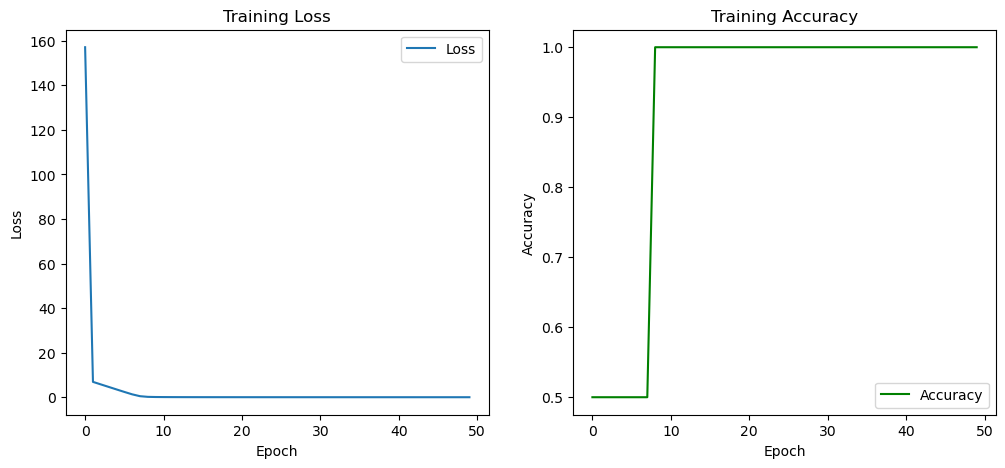

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# ----------------------------
# 1. Dataset (WebPOS AI fraud detection)
# ----------------------------
# Features: [Transaction Amount, Time of Day, Item Category]
X = np.array([
    [200, 23, 1],
    [20, 14, 0],
    [500, 2, 1],
    [15, 10, 0],
])

y = np.array([1, 0, 1, 0])  # 1 = Fraud, 0 = Not Fraud

# ----------------------------
# 2. Build Perceptron Model
# ----------------------------
model = Sequential()
model.add(Dense(1, input_dim=3, activation='sigmoid'))  # sigmoid ~ step function

# Compile model
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# ----------------------------
# 3. Train the Model
# ----------------------------
history = model.fit(X, y, epochs=50, verbose=0)

# ----------------------------
# 4. Evaluate
# ----------------------------
loss, acc = model.evaluate(X, y, verbose=0)
print(f"Final Accuracy: {acc:.2f}")

# ----------------------------
# 5. Test Prediction
# ----------------------------
test = np.array([[300, 22, 1]])  # new transaction
prediction = model.predict(test)
print("Fraud Probability:", prediction[0][0])

# ----------------------------
# 6. Plot Training Graphs
# ----------------------------
plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()

plt.show()


This way, you not only train a perceptron with Keras but also visualize how it classifies fraud vs non-fraud transactions.

What you’ll see

Decision Boundary Plot

Background shading shows fraud probability (blue = low, red = high).

Dots = training data (fraud vs not fraud).

You’ll see how the perceptron separates the two classes.

Training Graphs

Loss decreasing

Accuracy increasing

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step


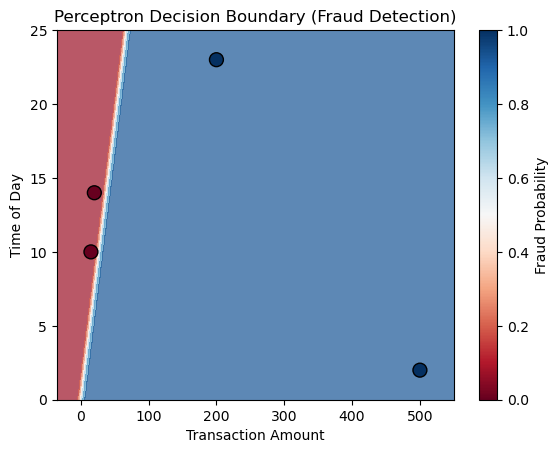

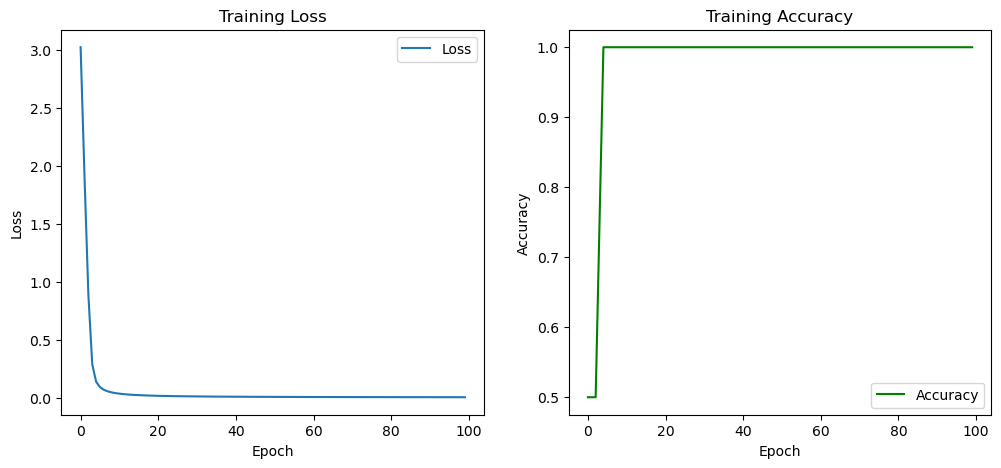

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# ----------------------------
# 1. Simplified Dataset (2 features: Amount, Time)
# ----------------------------
X = np.array([
    [200, 23],  # Fraud
    [20, 14],   # Not Fraud
    [500, 2],   # Fraud
    [15, 10],   # Not Fraud
])

y = np.array([1, 0, 1, 0])  # Labels

# ----------------------------
# 2. Build Perceptron Model
# ----------------------------
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# ----------------------------
# 3. Train Model
# ----------------------------
history = model.fit(X, y, epochs=100, verbose=0)

# ----------------------------
# 4. Decision Boundary Plot
# ----------------------------
# Create a grid of values covering transaction amount + time
x_min, x_max = X[:,0].min() - 50, X[:,0].max() + 50
y_min, y_max = X[:,1].min() - 2, X[:,1].max() + 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten grid, predict fraud probability
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.7, cmap='RdBu')

# Plot original data
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='RdBu', s=100)
plt.xlabel("Transaction Amount")
plt.ylabel("Time of Day")
plt.title("Perceptron Decision Boundary (Fraud Detection)")
plt.colorbar(label="Fraud Probability")
plt.show()

# ----------------------------
# 5. Training Graphs
# ----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()

plt.show()
